In [1]:
import pandas as pd
import numpy as np
import sys

from datetime import datetime
import time

from collections import defaultdict

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


%matplotlib inline

from math import log
from collections import Counter
import re



import os, sys, email,re
import numpy as np 
import pandas as pd
# Plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_style('whitegrid')
import wordcloud

# Network analysis
import networkx as nx

# NLP
from nltk.tokenize.regexp import RegexpTokenizer

from subprocess import check_output

# Network analysis
import networkx as nx
# NLP
from nltk.tokenize.regexp import RegexpTokenizer

from subprocess import check_output
import os, sys, email,re
import numpy as np 
import pandas as pd
# Plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_style('whitegrid')
#import wordcloud

# Network analysis
import networkx as nx

# NLP
from nltk.tokenize.regexp import RegexpTokenizer

from subprocess import check_output

from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import gensim
from gensim import corpora
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
from nltk.stem.porter import PorterStemmer
%matplotlib inline
%pylab inline
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.lda import LDA
from sklearn.decomposition import LatentDirichletAllocation

ModuleNotFoundError: No module named 'wordcloud'

In [2]:
emails_df = pd.read_csv('Enron_data_2000.csv')
emails_df = emails_df.drop(['Message-ID', 'X-Folder', 'X-cc', 'X-bcc', 'X-To', 'X-From', 'user', 'X-Origin', 'X-FileName'], axis = 1)
emails_df = emails_df.drop_duplicates(subset=None, keep='first', inplace=False)
emails_df.index = range(len(emails_df))
emails_df.head()

C:\Users\aemelyanova\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,From,To,Subject,content,TimeAll,Year
0,2000-01-01 14:36:00,['sally.beck@enron.com'],['fernley.dyson@enron.com'],Happy New Year - No Y2K Fear!,We are wrapping up several hours in the office...,946726560.0,2000
1,2000-01-01 19:17:00,['lenos@ucy.ac.cy'],['gordon.sick@rogroup.com'],Program attached; March NY RO Conference/Parti...,The current version of the conference program ...,946743420.0,2000
2,2000-01-02 13:12:00,['andrew.parsons@enron.com'],"['philippe.bibi@enron.com', 'mark.palmer@enron...",Summary of Y2K Glitches,Following please find a summary of the minor Y...,946807920.0,2000
3,2000-01-03 06:17:00,['emoler@velaw.com'],"['steven.kean@enron.com', 'cynthia.sandherr@en...",Options Memo,Here's the options memo you requested. Happy ...,946869420.0,2000
4,2000-01-03 08:20:00,['steven.kean@enron.com'],['maureen.mcvicker@enron.com'],Re: Additions to Working Groups,yes -- just make sure the working group lead...,946876800.0,2000


In [3]:
def change_subject(subject_text):
    subject_text = str(subject_text).lower()
    if subject_text[:3] == 're:':
        subject_text = subject_text[4:]
    if subject_text == '':
        return 'nan'
    return subject_text

In [5]:
emails_df['Subject'] = emails_df['Subject'].apply(lambda x: change_subject(x))

In [6]:
emails_df

,Date,From,To,Subject,content,TimeAll,Year
0,2000-01-01 14:36:00,['sally.beck@enron.com'],['fernley.dyson@enron.com'],happy new year - no y2k fear!,We are wrapping up several hours in the office...,946726560.0,2000
1,2000-01-01 19:17:00,['lenos@ucy.ac.cy'],['gordon.sick@rogroup.com'],program attached; march ny ro conference/parti...,The current version of the conference program ...,946743420.0,2000
2,2000-01-02 13:12:00,['andrew.parsons@enron.com'],"['philippe.bibi@enron.com', 'mark.palmer@enron...",summary of y2k glitches,Following please find a summary of the minor Y...,946807920.0,2000
3,2000-01-03 06:17:00,['emoler@velaw.com'],"['steven.kean@enron.com', 'cynthia.sandherr@en...",options memo,Here's the options memo you requested. Happy ...,946869420.0,2000
4,2000-01-03 08:20:00,['steven.kean@enron.com'],['maureen.mcvicker@enron.com'],additions to working groups,yes -- just make sure the working group lead...,946876800.0,2000
5,2000-01-03 08:33:00,['steven.kean@enron.com'],['paul.kaufman@enron.com'],testimony in pge proceeding,I won't be able to attend. Let me know if I n...,946877580.0,2000
6,2000-01-03 09:29:00,['john.lavorato@enron.com'],['cliff.lawrick@enron.com'],nan,Cliff I want to add a seat between Chad and th...,946880940.0,2000
7,2000-01-03 09:32:00,['chris.dorland@enron.com'],['jean.bell@enron.com'],reliant energy,The tag number on this deal is N67904.2\r\n\r\...,946881120.0,2000
8,2000-01-03 09:41:00,['john.lavorato@enron.com'],['david.oxley@enron.com'],nan,David\r\n\r\nI'm going to extend and offer to ...,946881660.0,2000
9,2000-01-03 09:44:00,['john.lavorato@enron.com'],['dawn.doucet@enron.com'],nan,"Dawn, call me on Lambie and Brodeur.",946881840.0,2000


In [7]:
emails_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65982 entries, 0 to 65981
Data columns (total 7 columns):
Date       65982 non-null object
From       65982 non-null object
To         65982 non-null object
Subject    65982 non-null object
content    65982 non-null object
TimeAll    65982 non-null float64
Year       65982 non-null int64
dtypes: float64(1), int64(1), object(5)
memory usage: 3.5+ MB


In [7]:
dict_hw = {}
file_hw = open('hier_words.txt')
for st in file_hw.readlines():
    lst_st = st.split()
    weigh = lst_st[-1]
    lst_st.remove(weigh)
    dict_hw[' '.join(lst_st)]=weigh
    

In [8]:
dict_hw

{'have you been': '-8.46614335712567',
 'to manage the': '-6.66945570122528',
 'you gave': '-6.64210570657968',
 'sender_kitchen': '-6.04623333207432',
 'lets discuss': '-5.72362776032607',
 'we are in': '-5.44488699181268',
 'publicly': '-5.24539180922239',
 'title': '-5.05002079531502',
 'promotion': '-5.02996664071749',
 'include the': '-4.82601348607844',
 'need in': '-4.80806558268773',
 'good one': '-4.62452560329102',
 'opened': '-4.57885956153461',
 'determine the': '-4.47895064626732',
 'initiatives': '-4.38690175958595',
 'is difficult': '-4.36140740430373',
 '. i would': '-4.34303518420259',
 'man': '-4.26907578872594',
 'we will probably': '-4.12325700642365',
 'number we': '-4.1130357559842',
 'sender_delainey': '-4.10676407156845',
 'any comments': '-4.06872897631117',
 'contact you': '-4.05581747833457',
 'you said': '-3.9992372028138',
 'the problem is': '-3.9761534907043',
 'i left': '-3.88710812224951',
 'you did': '-3.78940983635193',
 'sender_lavorato': '-3.75863697

In [9]:
max_hw = max(list(dict_hw.values()))
min_hw = min(list(dict_hw.values()))
dict_hw_new = {}
for k, v in dict_hw.items():
    if v == '0':
        dict_hw_new[k] = 0
        continue
    dict_hw_new[k] = float(v[:-4])

In [10]:
max_hw = max(list(dict_hw_new.values()))
min_hw = min(list(dict_hw_new.values()))
dict_hw_norm = {}
for k, v in dict_hw_new.items():
        dict_hw_norm[k] = (v - min_hw)/(max_hw - min_hw)

In [12]:
emails_df['Date'] = pd.to_datetime(emails_df['Date'])
emails_df['To'] = emails_df['To'].apply(lambda x: frozenset(x[1:-1].split(',')))
emails_df['From'] = emails_df['From'].apply(lambda x: frozenset(x[1:-1].split(',')))

###### Количество сообщений за год

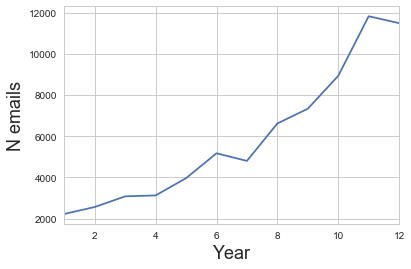

In [62]:
ax = emails_df.groupby(emails_df['Date'].dt.month)['content'].count().plot()
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('N emails', fontsize=18)

###### Количество сообщений в течение недели

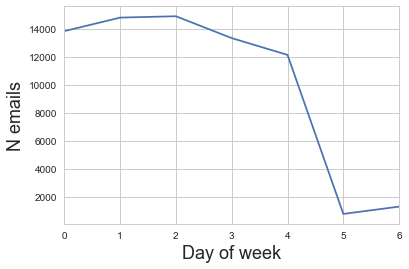

In [63]:
ax = emails_df.groupby(emails_df['Date'].dt.dayofweek)['content'].count().plot()
ax.set_xlabel('Day of week', fontsize=18)
ax.set_ylabel('N emails', fontsize=18)

In [6]:
len(set(emails_df.From))

5601

###### Количество сообщение в теччение дня

In [5]:
ax = emails_df.groupby(emails_df['Date'].dt.hour)['content'].count().plot()
ax.set_xlabel('Hour', fontsize=18)
ax.set_ylabel('N emails', fontsize=18)

AttributeError: Can only use .dt accessor with datetimelike values

###### Сообщения работников

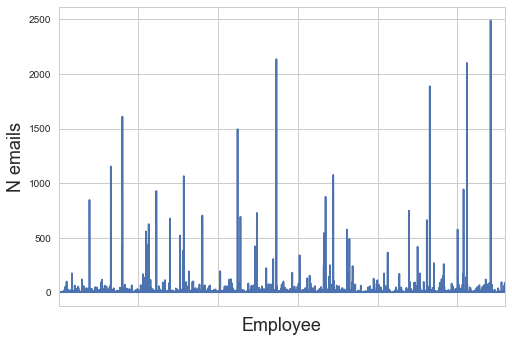

In [4]:
ax = emails_df.groupby(emails_df['From'])['content'].count()
ax=ax.plot()
ax.set_xticklabels([])
ax.set_xlabel('Employee', fontsize=18)
ax.set_ylabel('N emails', fontsize=18)

###### Кто кому сколько отправляет сообщений (один получатель)

In [66]:
sub_df = emails_df[['From', 'To', 'Date']].dropna()
print(sub_df.shape)
sub_df = sub_df.loc[sub_df['To'].map(len) == 1]
print(sub_df.shape)

(71109, 3)
(51260, 3)


In [67]:
emails_df['To'][10]

frozenset({"'john.sherriff@enron.com'"})

In [68]:
sub_df = sub_df.groupby(['From', 'To']).count().reset_index()

sub_df['From'] = sub_df['From'].map(lambda x: next(iter(x)))
sub_df['To'] = sub_df['To'].map(lambda x: next(iter(x)))

sub_df.rename(columns={'Date': 'count'}, inplace=True)
sub_df.sort('count', ascending=False).head(10)

C:\Users\aemelyanova\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,From,To,count
8209,'vince.kaminski@enron.com','vkaminski@aol.com',634
10954,'enron.announcements@enron.com','all.worldwide@enron.com',451
10961,'enron.announcements@enron.com','all.houston@enron.com',283
14169,'kay.mann@enron.com','suzanne.adams@enron.com',228
8221,'vince.kaminski@enron.com','shirley.crenshaw@enron.com',224
6785,'leslie.hansen@enron.com','tana.jones@enron.com',223
5992,'office.chairman@enron.com','all.worldwide@enron.com',185
3642,'jeffrey.shankman@enron.com','jennifer.burns@enron.com',162
6171,'matthew.lenhart@enron.com','shelliott@dttus.com',130
8827,'drew.fossum@enron.com','martha.benner@enron.com',123


###### Отправление писем и ответы на письма

In [69]:
# Make a network of email sender and receipients
G = nx.from_pandas_dataframe(sub_df, 'From', 'To', edge_attr='count', create_using=nx.DiGraph())
print('Number of nodes: %d, Number of edges: %d' % (G.number_of_nodes(), G.number_of_edges()))

Number of nodes: 8030, Number of edges: 16533


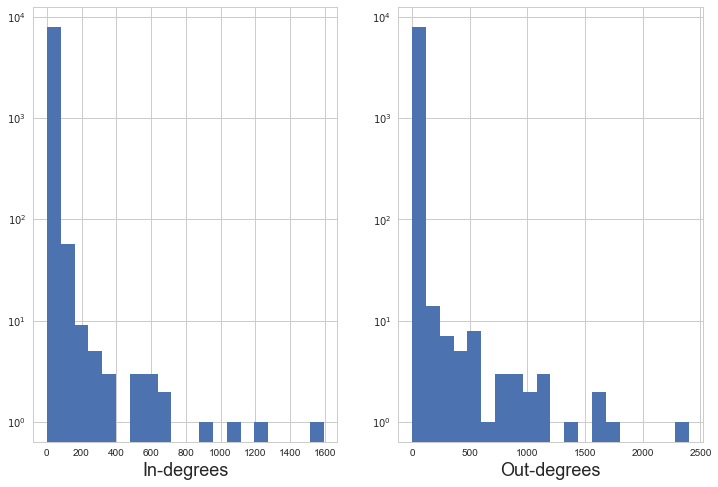

In [70]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 8))
ax1.hist(list(G.in_degree(weight='count').values()), log=True, bins=20)
ax1.set_xlabel('In-degrees', fontsize=18)

ax2.hist(list(G.out_degree(weight='count').values()), log=True, bins=20)
ax2.set_xlabel('Out-degrees', fontsize=18)

###### О чем говорят в темах сообщений 

(-0.5, 799.5, 599.5, -0.5)

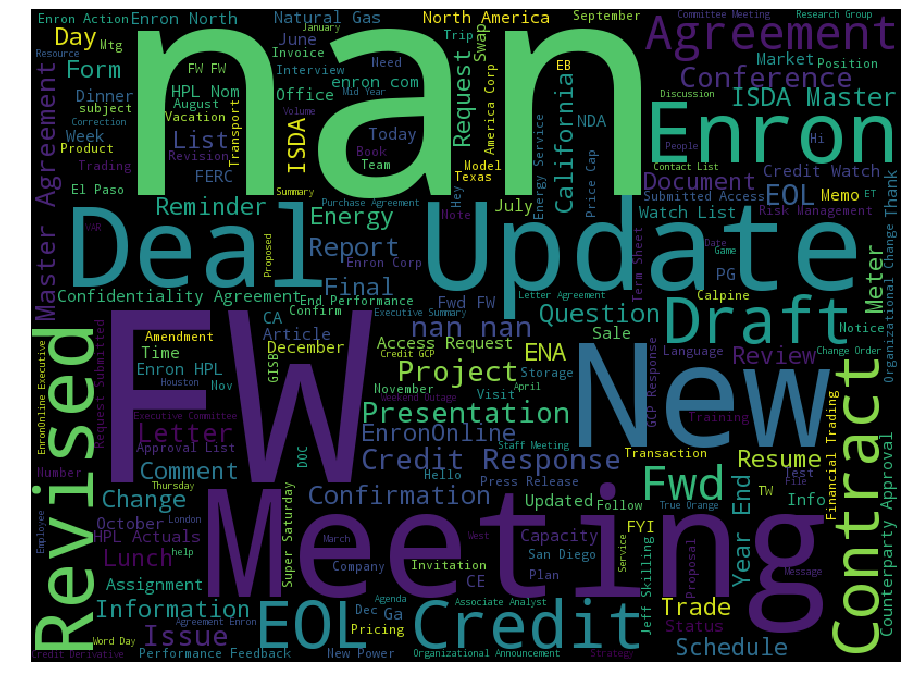

In [71]:
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

subjects = ' '.join(str(v) for v in emails_df['Subject'])
fig, ax = plt.subplots(figsize=(16, 12))
wc = wordcloud.WordCloud(width=800, 
                         height=600, 
                         max_words=200,
                         stopwords=ENGLISH_STOP_WORDS).generate(subjects)
ax.imshow(wc)
ax.axis("off")

###### О чем говорят в сообщениях

(-0.5, 799.5, 599.5, -0.5)

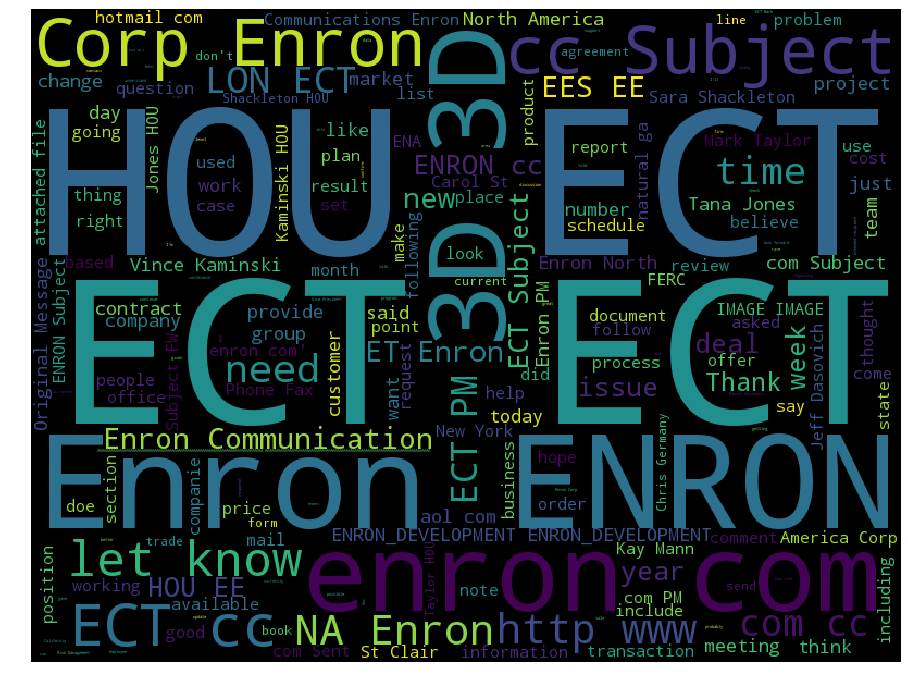

In [72]:
contents = ' '.join(str(v) for v in emails_df.sample(20000)['content'])
fig, ax = plt.subplots(figsize=(16, 12))
wc = wordcloud.WordCloud(width=800, 
                         height=600, 
                         max_words=200,
                         stopwords=ENGLISH_STOP_WORDS).generate(contents)
ax.imshow(wc)
ax.axis("off")

###### Чистка сообщений

In [2]:
def clean(text):
    stop = set(stopwords.words('english'))
    stop.update(("to","cc","subject","http","from","sent","aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa"))
    exclude = set(string.punctuation) 
    lemma = WordNetLemmatizer()
    porter= PorterStemmer()
    
    text=text.rstrip()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    stop_free = " ".join([i for i in text.lower().split() if((i not in stop) and (not i.isdigit()))])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    #stem = " ".join(porter.stem(token) for token in normalized.split())
    
    return normalized

In [15]:
emails_df['clean_content'] = emails_df['content'].apply(lambda x: clean(x))

###### Нахождение степени иерархичности сообщения

In [11]:
words = list(dict_hw.keys())
def creat_dict_word_cos(content):
    dict_word_cos = {}
    sentenses = content.split('.')
    if len(sentenses) == 1:
        text = clean(content).split()
    
    else:   
        clean_sentenses = []
        for sentense in sentenses:
            clean_sentense = clean(sentense)
            if len(clean_sentense) == 0:
                continue
            else:
                clean_sentenses.append(clean_sentense.split())
        text = clean_sentenses 
    if len(text) == 0:
        return 0
    try:
        model = gensim.models.Word2Vec(text, min_count=1, workers=2)
    except:
        print('text:', text)
        print('contenct:', content)
    dict_word_cos = {}
    for word in words:
        if word in model:
            for i in model.most_similar(positive=[word], topn=1):
                #print(word, '|', i[0], i[1])
                dict_word_cos[word]=i[1]
    return dict_word_cos

In [12]:
def find_weigh(dict_word_cos):
    if dict_word_cos == 0:
        return 0
    lst_weigh = []
    for k, v in dict_word_cos.items():
        if dict_hw[k] != '0':
            lst_weigh.append(float(dict_hw[k]))
    return np.mean(lst_weigh)

In [19]:
emails_df['weigh_content'] = emails_df['content'].apply(lambda x:find_weigh(creat_dict_word_cos(x)))

C:\Users\aemelyanova\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [20]:
emails_df = emails_df.fillna(0)

##### Определение тредов 1 способом

1й способ является строгим способом определения треда: тредом является цепочка сообщений с одинаковой темой, в которой получатели и отправители содержат в себе тех людей, которые начали цепочку первыми

In [21]:
emails_df['Index'] = list(emails_df.index)

In [22]:
set_sub = list(set(emails_df['Subject']))
dict_ind_thread = {}
ind_thread = 1
for sub in set_sub:
    if sub == 'nan' or sub == '':
        df_s = emails_df[emails_df.Subject == sub]
        list_ind = list(df_s['Index'])
        for i in list_ind:
            dict_ind_thread[i] = 0
        #print(i, dict_ind_thread[i])
        continue
        
    df_s = emails_df[emails_df.Subject == sub]
    if len(df_s) == 1:
        dict_ind_thread[df_s['Index'].values[0]] = ind_thread
        ind_thread += 1
        continue
    
    sub_list_from = list(df_s['From'])
    sub_list_to = list(df_s['To'])
    list_ind = list(df_s['Index'])
    for f, t, ind in zip(range(len(sub_list_from)), range(len(sub_list_to)), range(len(list_ind))):
        if list_ind[ind] in dict_ind_thread:
            continue
        dict_ind_thread[list_ind[ind]] = ind_thread

        set_to = sub_list_to[t]
        set_from = sub_list_from[f]
        for f_next, t_next, ind_next in zip(sub_list_from[f:], sub_list_to[t:], list_ind[ind:]):
            if (len(set_to.intersection(f_next)) !=0 and len(set_from.intersection(t_next)) !=0) or (len(set_to.intersection(t_next)) !=0 and len(set_from.intersection(f_next)) !=0):
                if list_ind[ind] in dict_ind_thread:
                    dict_ind_thread[ind_next] = ind_thread
        ind_thread += 1

In [23]:
emails_df['Number_of_thread']  = emails_df['Index'].apply(lambda x: dict_ind_thread[x])

In [31]:
import csv
emails_df.to_csv('emails_dataset_2000.csv', index = False)

### Загрузка обновленного дасета 1

###### Исследование тредов

In [3]:
emails_df = pd.read_csv('emails_dataset_2000.csv')
emails_df = emails_df.drop('Unnamed: 0', axis = 1)
emails_df['Date'] = pd.to_datetime(emails_df['Date'])
emails_df['To'] = emails_df['To'].apply(lambda x: frozenset(x[1:-1].split(',')))
emails_df['From'] = emails_df['From'].apply(lambda x: frozenset(x[1:-1].split(',')))
emails_df.head()

,Date,From,To,Subject,content,TimeAll,Year,clean_content,weigh_content,Index,Number_of_thread
0,2000-01-01 14:36:00,"(rozenset({""'sally.beck@enron.com'""})","(rozenset({""'fernley.dyson@enron.com'""})",happy new year - no y2k fear!,We are wrapping up several hours in the office...,946726560.0,2000,wrapping several hour office tested commodity ...,0.406400,0,4700
1,2000-01-01 19:17:00,"(rozenset({""'lenos@ucy.ac.cy'""})","(rozenset({""'gordon.sick@rogroup.com'""})",program attached; march ny ro conference/parti...,The current version of the conference program ...,946743420.0,2000,current version conference program attached pl...,0.186760,1,741
2,2000-01-02 13:12:00,"(rozenset({""'andrew.parsons@enron.com'""})","( "" 'richard.causey@enron.com'"", "" 'mike.mcco...",summary of y2k glitches,Following please find a summary of the minor Y...,946807920.0,2000,following please find summary minor k related ...,0.950536,2,29998
3,2000-01-03 06:17:00,"(rozenset({""'emoler@velaw.com'""})","( "" 'cynthia.sandherr@enron.com'""}, rozenset({...",options memo,Here's the options memo you requested. Happy ...,946869420.0,2000,option memo requested happy new year betsy doc...,0.000000,3,3288
4,2000-01-03 08:20:00,"(rozenset({""'steven.kean@enron.com'""})","(rozenset({""'maureen.mcvicker@enron.com'""})",additions to working groups,yes -- just make sure the working group lead...,946876800.0,2000,yes make sure working group leader know mauree...,-0.354024,4,3245


In [16]:
emails_df['Month'] = emails_df.Date.apply(lambda x: x.month)
emails_df = emails_df[emails_df['Month'] < 3]
emails_df

,Date,From,To,Subject,content,TimeAll,Year,clean_content,weigh_content,Index,Number_of_thread,Month
0,2000-01-01 14:36:00,"(rozenset({""'sally.beck@enron.com'""})","(rozenset({""'fernley.dyson@enron.com'""})",happy new year - no y2k fear!,We are wrapping up several hours in the office...,946726560.0,2000,wrapping several hour office tested commodity ...,0.406400,0,4700,1
1,2000-01-01 19:17:00,"(rozenset({""'lenos@ucy.ac.cy'""})","(rozenset({""'gordon.sick@rogroup.com'""})",program attached; march ny ro conference/parti...,The current version of the conference program ...,946743420.0,2000,current version conference program attached pl...,0.186760,1,741,1
2,2000-01-02 13:12:00,"(rozenset({""'andrew.parsons@enron.com'""})","( "" 'richard.causey@enron.com'"", "" 'mike.mcco...",summary of y2k glitches,Following please find a summary of the minor Y...,946807920.0,2000,following please find summary minor k related ...,0.950536,2,29998,1
3,2000-01-03 06:17:00,"(rozenset({""'emoler@velaw.com'""})","( "" 'cynthia.sandherr@enron.com'""}, rozenset({...",options memo,Here's the options memo you requested. Happy ...,946869420.0,2000,option memo requested happy new year betsy doc...,0.000000,3,3288,1
4,2000-01-03 08:20:00,"(rozenset({""'steven.kean@enron.com'""})","(rozenset({""'maureen.mcvicker@enron.com'""})",additions to working groups,yes -- just make sure the working group lead...,946876800.0,2000,yes make sure working group leader know mauree...,-0.354024,4,3245,1
5,2000-01-03 08:33:00,"(rozenset({""'steven.kean@enron.com'""})","(rozenset({""'paul.kaufman@enron.com'""})",testimony in pge proceeding,I won't be able to attend. Let me know if I n...,946877580.0,2000,able attend let know need hooked phone brief a...,0.310965,5,29983,1
6,2000-01-03 09:29:00,"(rozenset({""'john.lavorato@enron.com'""})","(rozenset({""'cliff.lawrick@enron.com'""})",NaN,Cliff I want to add a seat between Chad and th...,946880940.0,2000,cliff want add seat chad window check john,-1.027289,6,0,1
7,2000-01-03 09:32:00,"(rozenset({""'chris.dorland@enron.com'""})","(rozenset({""'jean.bell@enron.com'""})",reliant energy,The tag number on this deal is N67904.2\r\r\r\...,946881120.0,2000,tag number deal n please address future deal i...,0.000000,7,46462,1
8,2000-01-03 09:41:00,"(rozenset({""'john.lavorato@enron.com'""})","(rozenset({""'david.oxley@enron.com'""})",NaN,David\r\r\r\n\r\r\r\nI'm going to extend and o...,946881660.0,2000,david going extend offer someone currently wor...,-0.338035,8,0,1
9,2000-01-03 09:44:00,"(rozenset({""'john.lavorato@enron.com'""})","(rozenset({""'dawn.doucet@enron.com'""})",NaN,"Dawn, call me on Lambie and Brodeur.",946881840.0,2000,dawn call lambie brodeur,0.000000,9,0,1


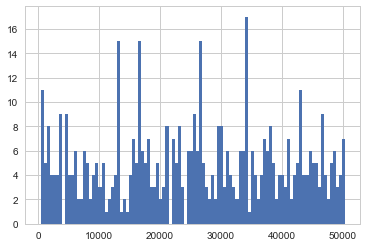

In [17]:
plt.hist(emails_df[emails_df.Number_of_thread != 0]['Number_of_thread'][:500], bins = 100)
plt.show()

Исследование зависимости длины треда от веса иерархичности сообщения

In [78]:
lst_w = []
len_sub = []
set_thread = list(set(emails_df.Number_of_thread))
for n in set_thread:
    if n == 0:
        continue
    df = emails_df[emails_df.Number_of_thread == n]
    if len(df) == 1:
        continue
    len_sub.append(len(df))
    lst_w.append(np.std(df['weigh_content']))    

In [80]:
df_n = pd.DataFrame()
df_n['w'] = lst_w
df_n['l'] = len_sub
df_n = df_n.sort_values(by = 'w')
df_n

,w,l
174,0.000000,2
362,0.000000,2
53,0.000000,4
52,0.000000,2
209,0.000000,2
99,0.000000,2
240,0.000000,2
211,0.000000,3
97,0.000000,2
348,0.000000,2


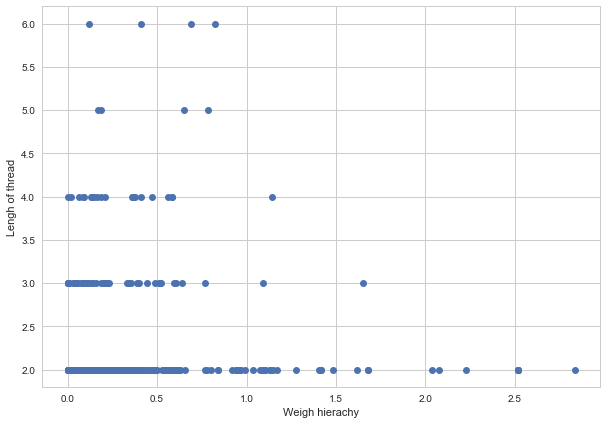

In [81]:
figure(figsize=(10, 7))
plt.plot(df_n['w'], df_n['l'],   'o')
plt.xlabel('Weigh hierachy')
plt.ylabel('Lengh of thread')
plt.show()

Зависимость количества людей, которые не пишут в треде от длины треда

In [9]:
length_threads = []
amount_people_off = []
for n in set_thread:
    if n == 0: continue
    df1 = emails_df[(emails_df.Number_of_thread == n)]
    
    a = set()
    for rec in df1.To:
        for r in rec:
            a.add(r)

    for i in df1.From[1:]:
        if i in a:
            a.remove(i)
    amount_people_off.append(len(a))
    
    #timeAll = list(df1.TimeAll)
    #for t in range(len(timeAll)-1):
        #if (timeAll[t+1] - timeAll[t]) < 5:
            #firstToDeleteID = list(df1[df1.TimeAll == timeAll[t+1]].Index)[0]
            #df1 = df1[df1.Index != firstToDeleteID]
      
    length_threads.append(len(df1))

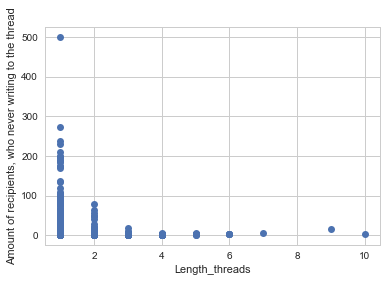

In [10]:
plt.plot(length_threads, amount_people_off, 'o')
plt.ylabel('Amount of recipients, who never writing to the thread')
plt.xlabel('Length_threads') 

In [21]:
for n in set_thread:
    df1 = emails_df[(emails_df.Number_of_thread == n)]
    if len(df1) > 100:
        print(n, len(df1))

0 274


##### LDA модель и кластеризация сообщений

In [22]:
analysis_df=emails_df[['From', 'To', 'Date','content']].dropna().copy()
#analysis_df = analysis_df.loc[analysis_df['To'].map(len) == 1]
sub_df=analysis_df

In [23]:
#sub_df["content"]=sub_df["content"].map(clean)
text_clean=[]
for text in sub_df['content']:
    text_clean.append(clean(text).split())

In [24]:
dictionary = corpora.Dictionary(text_clean)
text_term_matrix = [dictionary.doc2bow(text) for text in text_clean]

Сборка и сохранение LDA модели

In [26]:
len(set(emails_df.Number_of_thread))

3822

In [27]:
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(text_term_matrix, num_topics=2000, id2word = dictionary)

C:\Users\aemelyanova\AppData\Local\Continuum\Anaconda3\lib\site-packages\gensim-2.1.0-py3.6-win-amd64.egg\gensim\models\ldamodel.py:694: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


In [29]:
ldamodel.save('LDA_model_2000')

OSError: 50804000 requested and 0 written

Выгрузка LDA модели

In [3]:
ldamodel = gensim.models.ldamodel.LdaModel.load('LDA_model_5000')

In [30]:
ldamodel.print_topics(num_topics=5, num_words=10)

[(782,
  '0.081*"clause" + 0.019*"inviting" + 0.019*"offering" + 0.019*"interstate" + 0.017*"pilot" + 0.017*"course" + 0.014*"mapping" + 0.014*"acceptable" + 0.013*"agreement" + 0.013*"would"'),
 (1172,
  '0.074*"simple" + 0.065*"credit" + 0.064*"result" + 0.052*"using" + 0.049*"factor" + 0.047*"model" + 0.047*"compared" + 0.043*"assumption" + 0.034*"calculation" + 0.032*"reserve"'),
 (1759,
  '0.138*"ron" + 0.061*"u" + 0.059*"bb" + 0.058*"ellen" + 0.042*"com" + 0.039*"e" + 0.033*"touch" + 0.029*"tca" + 0.018*"process" + 0.018*"attached"'),
 (1332,
  '0.122*"irrespective" + 0.072*"headhunter" + 0.014*"query" + 0.011*"apx" + 0.011*"securing" + 0.010*"flush" + 0.010*"supply" + 0.010*"ect" + 0.008*"enron" + 0.007*"market"'),
 (1930,
  '0.272*"practice" + 0.144*"enron" + 0.054*"present" + 0.052*"shelley" + 0.044*"corman" + 0.028*"et" + 0.021*"presentation" + 0.016*"risk" + 0.014*"america" + 0.013*"julie"')]

In [31]:
eng_stopwords = set(stopwords.words('english'))
def clean_text(text):
    #text = BeautifulSoup(text, 'html.parser').get_text()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    words = text.lower().split()
    words = [w for w in words if w not in eng_stopwords]
    return ' '.join(words)

analysis_df["clean_content"]=analysis_df.content.apply(clean_text)

In [32]:
wordvector = TfidfVectorizer(analyzer='word', stop_words='english', max_df=0.4, min_df=5)
short_analysis=analysis_df
wordvector_fit = wordvector.fit_transform(short_analysis.clean_content)
feature = wordvector.get_feature_names()

In [35]:
N = 2000
clf = KMeans(n_clusters=N)
labels = clf.fit_predict(wordvector_fit)

In [36]:
wordvector_fit_2d = wordvector_fit.todense()
pca = PCA(n_components=2).fit(wordvector_fit_2d)
datapoint = pca.transform(wordvector_fit_2d)

C:\Users\aemelyanova\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\lines.py:1206: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


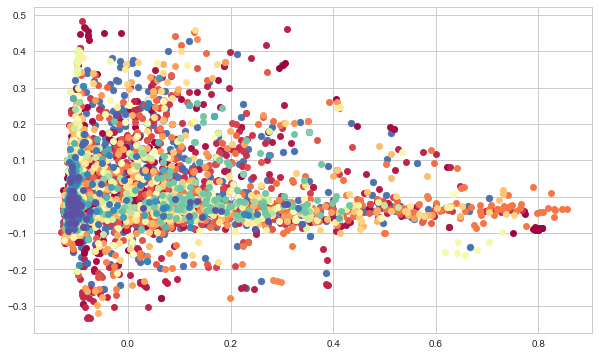

In [37]:
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
pylab.figure(figsize = (10, 6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'

    class_member_mask = (labels == k)

    xy = datapoint[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=7)

centroids = clf.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1])
plt.show()

In [39]:
emails_df['cluster_labels'] = labels

C:\Users\aemelyanova\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [54]:
def change_subject(subject_text):
    subject_text = str(subject_text).lower()
    if subject_text[:3] == 're:':
        subject_text = subject_text[4:]
    if subject_text == ''  or subject_text == np.nan or subject_text == 'nan':
        return 0
    return subject_text

In [55]:
emails_df['Subject'] = emails_df['Subject'].apply(lambda x: change_subject(x))

C:\Users\aemelyanova\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [59]:
Counter(list(emails_df[emails_df['Subject']  == 0]['cluster_labels']))

Counter({9: 1,
         11: 2,
         16: 64,
         18: 1,
         39: 1,
         44: 1,
         68: 2,
         76: 4,
         77: 1,
         80: 1,
         101: 2,
         103: 2,
         123: 1,
         135: 1,
         139: 2,
         143: 2,
         144: 1,
         172: 1,
         182: 3,
         192: 2,
         201: 1,
         256: 1,
         268: 1,
         294: 2,
         306: 1,
         323: 1,
         357: 3,
         379: 2,
         386: 1,
         394: 1,
         407: 2,
         427: 1,
         436: 1,
         475: 1,
         489: 2,
         512: 2,
         522: 2,
         523: 1,
         524: 2,
         531: 1,
         537: 1,
         540: 2,
         571: 2,
         574: 2,
         576: 1,
         581: 1,
         585: 4,
         604: 2,
         612: 1,
         613: 1,
         622: 1,
         623: 1,
         636: 2,
         638: 2,
         650: 3,
         681: 1,
         687: 2,
         690: 2,
         705: 1,
       

In [66]:
set(emails_df.Subject)

{0,
 'backing up dave',
 'monthly charges for analysts on your rc report',
 'response letter to john pope',
 'weekly notes',
 'counterparty approval list for 01/27/00',
 'tech services 2000 objectives',
 'congrats!!!',
 'organization developments',
 'back to back deals done today',
 'central puerto',
 'president@juno.com: exciting news - free internet access!',
 'nomination 2/4/2000',
 'transport contract review',
 "department of commerce missions on clean energy-request for enron's\r\r\r\n participation",
 'revised copanop # for 1st',
 'enabling agreement',
 'porlock vale in 2000',
 'fw: aggie arrested',
 'meter 986315 torch rally/el sordo 1/00',
 'sb 1741; technology specific area codes',
 '2/8 weekly cost summary & draw schedule - 99 peakers',
 'chris, i pathed everything but the 2 deals that i bolded. take\r\r\r\n a look a them and give me a call. thanks, rob',
 'counterparty approval list for 1/21/00',
 'tokemised periods - us nat gas',
 'basin elect',
 'origination deals',
 'new 

In [73]:
emails_df[emails_df['Subject'] == 'california storage']

,Date,From,To,Subject,content,TimeAll,Year,clean_content,weigh_content,Index,Number_of_thread,Month,cluster_labels
4541,2000-02-29 10:01:00,"(rozenset({""'drew.fossum@enron.com'""})","(rozenset({""'lorna.brennan@enron.com'""})",california storage,"No, not that I know of. I've never met the we...",951807660.0,2000,know never met western fossum know guy western...,0.052442,4541,11347,2,194
4543,2000-02-29 10:12:00,"(rozenset({""'drew.fossum@enron.com'""})","( ""'lbickle@hvllc.com'"", "" 'tdill@hvllc.com'""...",california storage,Congratulations! Sounds like the merchant sto...,951808320.0,2000,congratulation sound like merchant storage bus...,0.083235,4543,11348,2,194
4544,2000-02-29 10:35:00,"(rozenset({""'drew.fossum@enron.com'""})","( ""'avaina@markethubs.com'""}, rozenset({"" 'mca...",california storage,I finally stumbled over something that forced ...,951809700.0,2000,finally stumbled something forced get shit tog...,0.195088,4544,11349,2,194
4565,2000-02-29 13:02:00,"(rozenset({""'drew.fossum@enron.com'""})","(rozenset({""'jeffery.fawcett@enron.com'""})",california storage,Maybe he's my long lost granddad! DF\r\r\r\n\...,951818520.0,2000,maybe long lost granddad df jeffery fawcett dr...,0.029609,4565,11350,2,194


In [68]:
emails_df[(emails_df['cluster_labels']  == 139) & (emails_df['Subject'] == 0)]

,Date,From,To,Subject,content,TimeAll,Year,clean_content,weigh_content,Index,Number_of_thread,Month,cluster_labels
1917,2000-01-28 13:07:00,"(rozenset({""'chris.germany@enron.com'""})","(rozenset({""'sylvia.campos@enron.com'""})",0,How about we move it to ENA.\r\r\r\n\r\r\r\n\r...,949054020.0,2000,move ena sylvia campos pm chris germany hou ec...,-0.627513,1917,0,1,139
3515,2000-02-17 09:30:00,"(rozenset({""'chris.germany@enron.com'""})","(rozenset({""'katherine.kelly@enron.com'""})",0,---------------------- Forwarded by Chris Germ...,950769000.0,2000,forwarded chris germany hou ect diza alain diz...,-0.399349,3515,0,2,139


In [70]:
emails_df[emails_df['cluster_labels']  == 139]

,Date,From,To,Subject,content,TimeAll,Year,clean_content,weigh_content,Index,Number_of_thread,Month,cluster_labels
54,2000-01-04 13:58:00,"(rozenset({""'chris.germany@enron.com'""})","(rozenset({""'scott.neal@enron.com'"", "" 'dick....",ces acquisitions,---------------------- Forwarded by Chris Germ...,946983480.0,2000,forwarded chris germany hou ect pm james javin...,-0.627513,54,39969,1,139
737,2000-01-12 13:45:00,"(rozenset({""'chris.germany@enron.com'""})","(rozenset({""'sylvia.campos@enron.com'""})",new transco contract,Opps - 3.2846\r\r\r\n\r\r\r\n\r\r\r\n\r\r\r\...,947673900.0,2000,opps sylvia campos pm chris germany hou ect ec...,-0.598236,737,49587,1,139
776,2000-01-12 18:53:00,"(rozenset({""'chris.germany@enron.com'""})","(rozenset({""'beverly.beaty@enron.com'""})",new transco contract,This is in Sitara.\r\r\r\n--------------------...,947692380.0,2000,sitara forwarded chris germany hou ect pm sylv...,-0.598236,776,49588,1,139
1873,2000-01-27 18:43:00,"(rozenset({""'chris.germany@enron.com'""})","( "" 'sylvia.campos@enron.com'""}, rozenset({"" '...",trco,I just created a deal for TRCO contract 3.3433...,948987780.0,2000,created deal trco contract deal master contrac...,0.680142,1873,48588,1,139
1917,2000-01-28 13:07:00,"(rozenset({""'chris.germany@enron.com'""})","(rozenset({""'sylvia.campos@enron.com'""})",0,How about we move it to ENA.\r\r\r\n\r\r\r\n\r...,949054020.0,2000,move ena sylvia campos pm chris germany hou ec...,-0.627513,1917,0,1,139
1918,2000-01-28 13:09:00,"(rozenset({""'chris.germany@enron.com'""})","(rozenset({""'sylvia.campos@enron.com'""})",do you see 2.7055 in unify?,Could you find the deal ticket for Trco k#2.70...,949054140.0,2000,could find deal ticket trco k may forwarded ch...,-0.627513,1918,13235,1,139
2101,2000-01-31 15:33:00,"(rozenset({""'chris.germany@enron.com'""})","(rozenset({""'katherine.kelly@enron.com'""})",hey chris..........,---------------------- Forwarded by Chris Germ...,949321980.0,2000,forwarded chris germany hou ect pm diza alain ...,-0.457642,2101,39514,1,139
3515,2000-02-17 09:30:00,"(rozenset({""'chris.germany@enron.com'""})","(rozenset({""'katherine.kelly@enron.com'""})",0,---------------------- Forwarded by Chris Germ...,950769000.0,2000,forwarded chris germany hou ect diza alain diz...,-0.399349,3515,0,2,139
4066,2000-02-23 16:10:00,"(rozenset({""'chris.dorland@enron.com'""})","(rozenset({""'kerrie.murray@shell.ca'""})",sushi?,How is tommorow for sushi?\r\r\r\n\r\r\r\nChris,951311400.0,2000,tommorow sushi chris,0.000000,4066,4586,2,139


In [64]:
emails_df[(emails_df['cluster_labels']  == 16) & (emails_df['Subject'] == 0)]

,Date,From,To,Subject,content,TimeAll,Year,clean_content,weigh_content,Index,Number_of_thread,Month,cluster_labels
22,2000-01-04 09:03:00,"(rozenset({""'markskilling@hotmail.com'""})","( "" 'linda@cyrilandcrowley.com'"", "" 'sras@lyc...",0,"January 1, 2000\r\r\r\n\r\r\r\nEarlier, with s...",946965780.0,2000,january earlier trepidation turned laptop open...,-0.448668,22,0,1,16
65,2000-01-04 15:41:00,"(rozenset({""'john.lavorato@enron.com'""})","(rozenset({""'rob.milnthorp@enron.com'""})",0,"Rob, Paul is scheduled to come to Calgary earl...",946989660.0,2000,rob paul scheduled come calgary early next wee...,1.442453,65,0,1,16
139,2000-01-05 13:53:00,"(rozenset({""'chris.germany@enron.com'""})","(rozenset({""'james.javins@enron.com'""})",0,Just put 17 pages on the fax machine.,947069580.0,2000,put page fax machine,-0.811069,139,0,1,16
295,2000-01-07 10:27:00,"(rozenset({""'mark.haedicke@enron.com'""})","(rozenset({""'nicola.beales@enron.com'""})",0,"By copy of this message, I ask Janette to help...",947230020.0,2000,copy message ask janette help mark request ple...,0.000000,295,0,1,16
446,2000-01-10 15:23:00,"(rozenset({""'benjamin.rogers@enron.com'""})","(rozenset({""'david.martin@enron.com'"", "" 'bra...",0,Did you guys hear that Kevin Hannon left ENA t...,947506980.0,2000,guy hear kevin hannon left ena go eci somethin...,0.000000,446,0,1,16
450,2000-01-10 15:50:00,"(rozenset({""'eric.bass@enron.com'""})","(rozenset({""'danielles@jonesgranger.com'""})",0,"Hey,\r\r\r\nSorry to hear about mike's Dad. I...",947508600.0,2000,hey sorry hear mike dad hope handling ok guess...,1.068175,450,0,1,16
456,2000-01-10 16:12:00,"(rozenset({""'eric.bass@enron.com'""})","(rozenset({""'shelliott@dttus.com'""})",0,we had a great time at the swan. we went to e...,947509920.0,2000,great time swan went eat people enron made way...,0.518904,456,0,1,16
600,2000-01-11 12:45:00,"(rozenset({""'andrew.lewis@enron.com'""})","(rozenset({""'derek.davies@enron.com'""})",0,"Derek,\r\r\r\n\r\r\r\nAttached is the document...",947583900.0,2000,derek attached document prepared gmi area coul...,1.144934,600,0,1,16
772,2000-01-12 17:52:00,"(rozenset({""'phillip.allen@enron.com'""})","(rozenset({""'stouchstone@natsource.com'""})",0,Call me. I can't get out.,947688720.0,2000,call get,0.000000,772,0,1,16
833,2000-01-13 15:04:00,"(rozenset({""'lynne.delaurentis@mbia.com'""})","(rozenset({""'benjamin.rogers@enron.com'""})",0,Thank you--we will probably get back to Don so...,947765040.0,2000,thank probably get back sometime tomorrow orig...,0.607313,833,0,1,16
